In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt



#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve



Using TensorFlow backend.


In [2]:
import pickle

In [3]:
%run custom_functions_test.ipynb

In [4]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [5]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


## Train / Val / Test Split

In [6]:
X = df.drop(['label'], axis = 1)

In [7]:
y = df['label']

In [9]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y, test_size=0.20, random_state=123)

In [24]:
#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, stratify = y_model, test_size=0.20, random_state=123)

## Comparing Vectorization and Method Performance

In [26]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression(random_state=10)
rfc = RandomForestClassifier(random_state=10)
nb = GaussianNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



## Testing Fun

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics2, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='smote')

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='upsample')

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='downsample')

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, log, count_vect)

## Naive Bayes

In [ ]:
np.random.seed(0)

In [ ]:
NB_compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, GaussianNB())

## Logistic Regression

In [27]:
%run custom_functions_test.ipynb

In [28]:
#Logistic Regression: compare vectorizers with no presets
lr_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', random_state = 10), 
                                            vectorization_list)

lr_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.95,0.95,0.93
Train F1,0.89,0.47,0.47,0.14
Train Precision,0.99,0.88,0.89,0.96
Train Recall,0.80,0.32,0.32,0.08
Validation Accuracy,0.96,0.95,0.95,0.93
Validation F1,0.64,0.48,0.45,0.13
Validation Precision,0.85,0.89,0.85,0.87
Validation Recall,0.51,0.33,0.31,0.07


In [29]:
lr_results1.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [30]:
#Logistic Regression: compare vectorizers using lemmitizing + class balances
lr_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight= 'balanced', 
                            solver = 'lbfgs', random_state = 10), vectorization_list)
lr_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.89,0.90,0.53
Train F1,0.93,0.54,0.56,0.22
Train Precision,0.87,0.38,0.40,0.12
Train Recall,0.99,0.92,0.93,0.93
Validation Accuracy,0.95,0.88,0.88,0.51
Validation F1,0.66,0.48,0.48,0.20
Validation Precision,0.62,0.34,0.34,0.11
Validation Recall,0.72,0.81,0.80,0.86


In [31]:
lr_results2.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [32]:
#Logistic Regression: compare vectorizers using lemmitizing + upsampling
lr_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', 
                            random_state = 10), vectorization_list, sampling = 'upsample')
lr_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.94,0.96,0.79
Train F1,0.99,0.94,0.96,0.77
Train Precision,0.99,0.92,0.94,0.86
Train Recall,1.00,0.96,0.98,0.70
Validation Accuracy,0.95,0.91,0.92,0.86
Validation F1,0.67,0.55,0.56,0.34
Validation Precision,0.63,0.43,0.44,0.25
Validation Recall,0.70,0.77,0.77,0.50


In [33]:
lr_results3.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [34]:
#Logistic Regression: compare vectorizers using lemmitizing + downsampling
lr_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'downsample')
lr_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.93,0.94,0.82
Train F1,0.99,0.93,0.94,0.80
Train Precision,1.00,0.92,0.94,0.91
Train Recall,0.99,0.94,0.95,0.71
Validation Accuracy,0.85,0.84,0.83,0.82
Validation F1,0.44,0.42,0.41,0.30
Validation Precision,0.30,0.28,0.27,0.21
Validation Recall,0.84,0.84,0.83,0.55


In [35]:
lr_results4.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [48]:
#Logistic Regression: compare vectorizers using lemmitizing + smote
lr_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'smote', sample_class='not majority')
lr_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.89,0.90,0.56
Train F1,0.75,0.52,0.55,0.22
Train Precision,0.66,0.38,0.40,0.13
Train Recall,0.87,0.83,0.84,0.89
Validation Accuracy,0.89,0.88,0.88,0.54
Validation F1,0.48,0.47,0.47,0.20
Validation Precision,0.36,0.34,0.35,0.11
Validation Recall,0.70,0.75,0.74,0.81


In [49]:
lr_results5.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [ ]:
# with open('mycsvfile.csv','a') as f:
#     w = csv.writer(f)
#     w.writerows(LR_cw_lemm.items())

In [ ]:
# (pd.DataFrame.from_dict(data= LR_cw_lemm).to_csv('dict_file.csv', header=False))

### Grid Searching

In [ ]:
c_space = np.logspace(-5, 8, 15)
params = {'C': c_space, 
          'penalty': ['l1', 'l2']
           ''
         }

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_val, rfc_y_val_prob)

##  Final Logistic Regression Model

In [ ]:
lr_final = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1', random_state = 10), 
                            vectorization_list, sampling='upsample')
pd.DataFrame(lr_final)

In [ ]:
lr_final = wrapper_compare_vectorizations(X_model.lem_tweet, y_model, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1', random_state = 10), 
                            vectorization_list, sampling='upsample')
pd.DataFrame(lr_final)

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
log_train_X, log_val_X, log_y_train, log_y_val_pred, log_y_val_prob, log_metricsdict, log_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(class_weight='balanced', penalty = 'l1', random_state = 10), 
                             count_vect, sampling='upsample')

In [86]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
# X_test_countvect = count_vect.transform(X_test.lem_tweet)

In [87]:
log = LogisticRegression(class_weight='balanced', penalty = 'l1')

In [91]:
log.fit(X_train_countvect, y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_pred_val_lr1 = log.predict(X_val_countvect)

In [92]:
y_pred_val_lr = log.predict_proba(X_val_countvect)

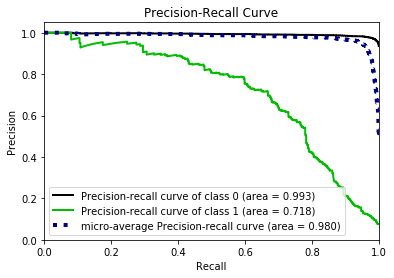

In [94]:
skplt.metrics.plot_precision_recall_curve(y_val, y_pred_val_lr)

In [103]:
print_confusion_matrix(y_val, y_pred_val_lr1)

,predicted 0,predicted 1
actual 0,4588,167
actual 1,97,262


In [107]:
%run custom_functions_test.ipynb

Adjusted Accuracy: 0.9483770043019163
Adjusted Precision: 0.6107226107226107
Adjusted Recall: 0.7298050139275766
Adjusted F1 Score: 0.66497461928934




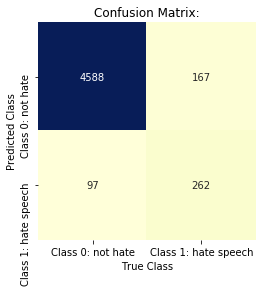

In [108]:
adjust_threshold_and_score(y_val, y_pred_val_lr, .5)

In [ ]:
pred_df[pred_df['actual_class'] != pred_df['predicted_class']]
pred_df.head()

In [ ]:
pred_df['weighted_predictions'] = weighted_predictions_val
pred_df[pred_df['actual_class'] != pred_df['weighted_predictions']].head()

In [ ]:
df.tweet[11418]

## Testing on Test Set

In [ ]:
X_train_transformed, metrics_dict, train_confusion_matrix, y_test_pred, y_test_prob, test_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_test.lem_tweet, y_test, 
                            logreg, count_vect, apply_smote = False)

## SVM


In [109]:
svm_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', random_state = 10), 
                            vectorization_list)
svm_results1 

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.93,0.93,0.93,0.93
Train F1,0.00,0.00,0.00,0.00
Train Precision,0.00,0.00,0.00,0.00
Train Recall,0.00,0.00,0.00,0.00
Validation Accuracy,0.93,0.93,0.93,0.93
Validation F1,0.00,0.00,0.00,0.00
Validation Precision,0.00,0.00,0.00,0.00
Validation Recall,0.00,0.00,0.00,0.00


In [110]:
svm_results1.to_csv('data/SVM_results.csv',mode = 'a',header ='column_names')

In [111]:
svm_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', class_weight = 'balanced', random_state = 10), 
                            vectorization_list)
svm_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.07,0.07,0.07,0.08
Train F1,0.13,0.13,0.13,0.13
Train Precision,0.07,0.07,0.07,0.07
Train Recall,1.00,1.00,1.00,1.00
Validation Accuracy,0.07,0.07,0.07,0.08
Validation F1,0.13,0.13,0.13,0.13
Validation Precision,0.07,0.07,0.07,0.07
Validation Recall,1.00,1.00,1.00,1.00


In [ ]:
svm_results2.to_csv('data/SVM_results.csv',mode = 'a',header ='column_names')

In [ ]:
svm_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(class_weight ='balanced', gamma='auto', probability= True, random_state = 10), 
                            vectorization_list, sampling = 'upsample')
svm_results3 

In [ ]:
svm_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(class_weight ='balanced', gamma='auto', probability = True, random_state = 10), 
                            vectorization_list, sampling = 'downsample')
svm_results4 

In [ ]:
svm_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(class_weight ='balanced', gamma='auto', probability = True, random_state = 10), 
                            vectorization_list, sampling = 'smote', sample_class='not majority')
svm_results5 

#### Grid Searching:

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
svc = SVC

params = {
'C': [0.1,.2, .3, 0.8,1,1.2,1.4],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4],
'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}] }

scores = ['accuracy','recall','precision','f1']

scv_rs = RandomizedSearchCV(rfc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

In [ ]:
svm_rs.fit(X_train_tfid2, y_train)

In [ ]:
svm_rs.best_estimator_

# Random Forest

### Compare Multiple Methods:

In [ ]:
 RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10)

In [37]:
#Random Forest: compare vectorizers with lemmatizing; no hyperparameter tuning
rfc_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), vectorization_list)
rfc_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.95
Train F1,0.95,0.94,0.94,0.41
Train Precision,1.00,1.00,1.00,0.92
Train Recall,0.91,0.89,0.89,0.26
Validation Accuracy,0.96,0.95,0.96,0.93
Validation F1,0.61,0.55,0.58,0.20
Validation Precision,0.93,0.84,0.86,0.64
Validation Recall,0.45,0.41,0.44,0.12


In [38]:
rfc_results1.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')


In [39]:
#Random Forest: compare vectorizers with lemmatizing and class weights balanced
rfc_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10, class_weight = 'balanced'), 
                            vectorization_list)
rfc_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.61
Train F1,0.95,0.94,0.94,0.25
Train Precision,1.00,0.98,0.98,0.14
Train Recall,0.91,0.90,0.91,0.91
Validation Accuracy,0.96,0.95,0.95,0.60
Validation F1,0.54,0.54,0.55,0.21
Validation Precision,0.98,0.84,0.84,0.12
Validation Recall,0.37,0.40,0.41,0.77


In [40]:
rfc_results2.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [41]:
#Random Forest: compare vectorizers with lemmatizing and upsampling
rfc_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'upsample')
rfc_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,1.00,1.00,1.00,0.85
Train F1,1.00,1.00,1.00,0.83
Train Precision,1.00,1.00,1.00,0.94
Train Recall,1.00,1.00,1.00,0.75
Validation Accuracy,0.96,0.95,0.95,0.90
Validation F1,0.59,0.61,0.59,0.38
Validation Precision,0.93,0.75,0.77,0.33
Validation Recall,0.43,0.52,0.48,0.43


In [42]:
rfc_results3.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [43]:
#Random Forest: compare vectorizers with lemmatizing and downsampling
rfc_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'downsample')
rfc_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.87
Train F1,0.99,0.99,0.99,0.85
Train Precision,1.00,1.00,1.00,0.97
Train Recall,0.98,0.98,0.98,0.76
Validation Accuracy,0.86,0.84,0.83,0.80
Validation F1,0.42,0.39,0.38,0.26
Validation Precision,0.30,0.27,0.26,0.18
Validation Recall,0.73,0.74,0.74,0.50


In [44]:
rfc_results4.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [50]:
#Random Forest: compare vectorizers with lemmatizing and smote
rfc_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
rfc_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,1.00,1.00,0.64
Train F1,0.96,0.99,0.99,0.25
Train Precision,0.95,0.98,0.99,0.15
Train Recall,0.96,0.99,0.99,0.86
Validation Accuracy,0.89,0.93,0.94,0.59
Validation F1,0.42,0.51,0.53,0.20
Validation Precision,0.34,0.52,0.56,0.12
Validation Recall,0.55,0.50,0.50,0.72


In [51]:
rfc_results5.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

### Grid-Searching For Best Fit for Count Vectorizer + Upsampling

In [ ]:
np.random.seed(0)

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
# X_test_countvect = count_vect.transform(X_test.lem_tweet)

In [ ]:
# rfc = RandomForestClassifier(random_state=10)

# parameters = {'n_estimators' : [40, 60, 80, 100, 120, 150],
# 'max_leaf_nodes' : [100, 200, 400, 600],
# 'random_state' : [10],
# 'max_depth': [5, 7, 10, 20, 30],
#  'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}] }
# # 'class_weight': ['balanced', 'balanced_subsample']}
          
# rfc_gs = GridSearchCV(rfc, param_grid=parameters, cv = 3)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(10)
rfc = RandomForestClassifier(random_state=10)

parameters = {'n_estimators' : [40, 60, 80, 100, 120],
'max_leaf_nodes' : [100, 200, 300, 400],
'random_state' : [10],
'max_depth': [5, 6, 7, 8, 10, 20, 25, 30],
 'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:6, 1: 4}, {0:8, 1:2}]}
'class_weight': ['balanced', 'balanced_subsample']}

scores = ['accuracy','recall','precision','f1']

rfc_gs = RandomizedSearchCV(rfc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

In [ ]:
rfc_gs.fit(X_train_countvect, y_train)

In [ ]:
rfc_gs.best_params_

In [ ]:
rfc_gs.best_score_

In [ ]:
rfc_df = pd.DataFrame(rfc_gs.cv_results_)
rfc_df

In [ ]:
rfc_df[rfc_df.rank_test_precision==1]

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)

In [ ]:
rfc3 = RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, class_weight='balanced_subsample',
                            max_depth = 25, random_state=10)

In [ ]:
rfc3.fit(X_train_countvect, y_train)

In [ ]:
y_rfc2_pred = rfc3.predict(X_train_countvect)

In [ ]:
metrics.f1_score(y_train, y_rfc2_pred)

In [ ]:
rfc_metrics2= \
wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200,
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            vectorization_list)

In [ ]:
rfc_metrics2

In [ ]:
rfc_metrics

In [ ]:
rfc_X_train, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, rfc_y_val_prob, rfc_metrics, rfc_pred_df = \
\
wrapper_single_vectorization(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, 
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            count_vect)

In [ ]:
print_classification_report(y_val, rfc_y_val_pred)

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
# print confusion matrix    
pd.DataFrame(confusion_matrix(y_val, rfc_y_val_pred), index = ['actual 0','actual 1'], columns = ['predicted 0', 'predicted 1'])

In [ ]:
rfc_X_train, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, rfc_y_val_prob, rfc_metrics, rfc_pred_df = \
\
wrapper_single_vectorization(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, 
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            count_vect)

In [ ]:
rfc_y_val_prob

In [ ]:
rfc_pred_df.head()

In [ ]:
rfc_pred_df.threshold.values

In [ ]:
pr_threshold_df.head()

In [ ]:
# def frange(start, stop, step):
#     i = start
#     while i < stop:
#         yield i
#         i += step

# names = ['cut_off', 'recall', 'precision']
# pr_threshold_df = pd.DataFrame()

# # for loop to test different cut-off values
# for i in frange(.2,.95,.015):
#     rfc_pred_df['threshold'] = np.where(rfc_pred_df['prob 1'] >= i, 1, 0)
#     tn, fp, fn, tp = confusion_matrix(rfc_pred_df['actual class'], rfc_pred_df['predicted class']).ravel()
#     recall = tp/(tp+fn)
#     precision = tp/(tp+fp)
#     evals = [i,recall, precision]
#     pr_threshold_df = pr_threshold_df.append(pd.Series(evals), ignore_index=True)

# pr_threshold_df.columns = names

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('seaborn-whitegrid')
# # plot the data
# plt.plot(pr_threshold_df.recall, pr_threshold_df.precision , '-', color='blue')
# plt.plot(pr_threshold_df.recall, pr_threshold_df.precision , 'o', color='black')

# plt.title('Precision-Recall curve')
# plt.ylabel('Precision')
# plt.xlabel('Recall')
# plt.savefig('pr_curve')


In [ ]:
skplt.metrics.plot_precision_recall_curve(y_val, rfc_y_val_prob)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight={0: 2, 1: 8},
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=400, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [ ]:
rfc2.fit(X_train_countvect, y_train)

In [ ]:
y_train_predict = rfc2.predict(X_train_countvect)
metrics.f1_score(y_train, y_train_predict)

In [ ]:
y_val_predict = rfc2.predict(X_val_countvect)

In [ ]:
metrics.f1_score(y_val, y_val_predict)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(rfc2):
    n_features = X_val_countvect.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), rfc2.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), countvect.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rfc2)

# Word to Vec

In [ ]:
type(df.tokenized_tweet[0])

In [ ]:
(X_train.tokenized_tweet[0])

In [ ]:
X_train.tokenized_tweet.head()

### X-train pre-processing

In [ ]:
X_train.tokenized_tweet.shape

In [ ]:
X_train_token_list = list(X_train.tokenized_tweet)

In [ ]:
type(X_train_token_list[0])

In [ ]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [ ]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

#### X-val pre-processing

In [ ]:
X_val_token_list = list(X_val['tokenized_tweet'])
X_val_token_sumlist = sum(X_val_token_list,[])
X_val_unique_tokens = set(X_val_token_sumlist)

print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

#### X-test pre-processing

In [ ]:
X_test_token_list = list(X_test['tokenized_tweet'])
X_test_token_sumlist = sum(X_test_token_list,[])

X_test_unique_tokens = set(X_test_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

### Training Model

In [ ]:
from time import time
t = time()

w2v_model = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model.train(X_train_token_list, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

In [ ]:
w2v_model.save('data/w2v.model')

w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [ ]:
w2v.corpus_count

In [ ]:
w2v_vocab= w2v.wv.vocab

In [ ]:
len(w2v_vocab)

In [ ]:
w2v.wv.vectors.shape

In [ ]:
w2v.wv['trump']

In [ ]:
w2v.wv.most_similar(['trump'])

In [ ]:
w2v.wv.most_similar(['racist'])

In [ ]:
w2v.wv.most_similar(positive=['lazy','black'])

In [ ]:
w2v.wv

In [ ]:
w2v.wv.get_keras_embedding

In [ ]:
w2v_X = w2v.wv.vectors

## Classification with Word2Vec

In [ ]:
sentence = X_train_token_list[1]
sentence

In [ ]:
X_train_w2v[20]

In [ ]:
#create average vector for train and test from model
#returned list of numpy arrays are then stacked 

X_train_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_train_token_list])

X_val_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_val_token_list])

In [ ]:
X_train_w2v_2[10]

## Classification with Word Embeddings

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, RandomForestClassifier())

### Glove

In [ ]:
# from gensim.scripts.glove2word2vec import glove2word2vec

# glove_input_file = 'data/glove.twitter.27B.100d.txt'
# glove_output_file = 'data/glove.txt.word2vec'
# glove2word2vec(glove_input_file, glove_output_file)

In [ ]:
glove_model = KeyedVectors.load_word2vec_format('data/glove.txt.word2vec', binary=False)

In [ ]:
w2v.most_similar('black')

In [ ]:
glove_model.most_similar('black')

In [ ]:
glove_model['love']

In [ ]:
X_train_token_list[0]

In [ ]:
X_train_glove2 = np.empty((20455, 100))
for sentence in X_train_token_list:
    np.append(X_train_glove2, np.mean([glove_model[w] for w in sentence if w in glove_model]
                   or [np.zeros(100)], axis=0))

In [ ]:
X_train_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_val_token_list])

In [ ]:
X_train_w2v[10]

In [ ]:
X_train_w2v_2[10]

In [ ]:
X_train_glove[255]

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression (class_weight='balanced'))

##  Testing Scraped Trump Tweets

In [ ]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [ ]:
logreg = LogisticRegression(class_weight='balanced')

In [ ]:
logreg.fit(X_train_countvect, y_train_up)

In [ ]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [ ]:
X_trump = X_trump.toarray()

In [ ]:
X_trump.shape

In [ ]:
y_trump_predict = logreg.predict(X_trump)

In [ ]:
y_trump_predict

In [ ]:
trump_df['predictions'] = y_trump_predict

In [ ]:
y_trump_predict_prob = logreg.predict_proba(X_trump)

In [ ]:
y_trump_predict_prob = pd.DataFrame(y_trump_predict_prob)

In [ ]:
trump_df['predict_probability'] = y_trump_predict_prob[0]

In [ ]:
trump_df = trump_df[['tweet','predictions', 'predict_probability']]


In [ ]:
trump0 = trump_df[trump_df.predictions == 0]

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
trump0.tweet

In [ ]:
trump_df

In [ ]:
trump_df[trump_df.predictions == 0]

In [ ]:
trump1 = trump_df[trump_df.predictions == 1]

In [ ]:
trump1.tweet